# Descriptive Analysis - US Accidents 2019

In [2]:
# Import Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import dfset
df = pd.read_parquet('../data/raw/US_Accidents_2019_V2.parquet')

# Display first 3 Lines of the dfset
df.head(3)

,source,severity,starttime,startlat,startlng,street,city,county,state,zipcode,...,roundabout,station,stop,trafficcalming,trafficsignal,turningloop,sunrisesunset,civiltwilight,nauticaltwilight,astronomicaltwilight
0,Source2,3,2019-12-26 17:09:52,40.884850,-95.800362,I-29 S,Thurman,Fremont,IA,51654,...,0,0,0,0,0,0,Night,Day,Day,Day
1,Source2,3,2019-12-26 17:10:32,40.889641,-95.798630,I-29 N,Thurman,Fremont,IA,51654,...,0,0,0,0,0,0,Night,Day,Day,Day
2,Source2,3,2019-12-31 23:49:36,42.313499,-83.091225,Fisher Fwy W,Detroit,Wayne,MI,48209,...,0,0,0,0,0,0,Night,Night,Night,Night


##### dfset Shape

In [3]:
# Check dfset Shape (Rows x Variables)
df.shape

(954302, 40)

We have 954,302 Records with 40 Predictory Variables.

##### dfset Variables Info

In [4]:
# Basic dfset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954302 entries, 0 to 954301
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   source                954302 non-null  object 
 1   severity              954302 non-null  int64  
 2   starttime             954302 non-null  object 
 3   startlat              954302 non-null  float64
 4   startlng              954302 non-null  float64
 5   street                954302 non-null  object 
 6   city                  954283 non-null  object 
 7   county                954302 non-null  object 
 8   state                 954302 non-null  object 
 9   zipcode               953988 non-null  object 
 10  country               954302 non-null  object 
 11  timezone              952879 non-null  object 
 12  airportcode           952067 non-null  object 
 13  weathertimestamp      942676 non-null  object 
 14  temperaturef          937177 non-null  float64
 15  

Looking at the df Types of our dfset we have the following types of df: 

- Floats
- Integers
- Strings
- Dates & Time

We will have to proceed to convert the Date and Time variables to DateTime df type objects to be able to work properly ahead. 
These variables will provide us good predictory information. 

In [5]:
# Convert the Date and Time Variables from Object / Float to DateTime

# Convert Start_Time and End_Time to datetypes
df['starttime'] = pd.to_datetime(df['starttime'], errors='coerce')

# Get the individual information from time on separate Columns
df['year']=df['starttime'].dt.year
df['month']=df['starttime'].dt.strftime('%b')
df['day']=df['starttime'].dt.day
df['hour']=df['starttime'].dt.hour
df['weekday']=df['starttime'].dt.strftime('%a')

In [6]:
# Verify The Conversion 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954302 entries, 0 to 954301
Data columns (total 45 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   source                954302 non-null  object        
 1   severity              954302 non-null  int64         
 2   starttime             954302 non-null  datetime64[ns]
 3   startlat              954302 non-null  float64       
 4   startlng              954302 non-null  float64       
 5   street                954302 non-null  object        
 6   city                  954283 non-null  object        
 7   county                954302 non-null  object        
 8   state                 954302 non-null  object        
 9   zipcode               953988 non-null  object        
 10  country               954302 non-null  object        
 11  timezone              952879 non-null  object        
 12  airportcode           952067 non-null  object        
 13 

Our df was succesfully converted to DateTime. 

#### Descriptive Statistics of the dfset

In [7]:
# Dividing the Variables into Numerical, Categorical and DateTime for analysis
# We excluded Description as Variable

numerical = [
       'startlat', 'startlng',
       'temperaturef', 'windchillf',
       'humidity', 'pressurein', 'visibilitymi','windspeedmph', 'precipitationin'
]

categorical = [
    'severity','street', 'city', 'zipcode', 'county', 'state','country','timezone','airportcode','winddirection','weathercondition', 'amenity',
       'bump', 'crossing', 'giveway', 'junction', 'noexit', 'railway',
       'roundabout', 'station', 'stop', 'trafficcalming', 'trafficsignal',
       'turningloop', 'sunrisesunset', 'civiltwilight', 'nauticaltwilight',
       'astronomicaltwilight'
]

datetime = [
        'starttime'
]

In [8]:
# Get the dfset statistics

pd.set_option('display.max_columns', None)
df[numerical].describe()

,startlat,startlng,temperaturef,windchillf,humidity,pressurein,visibilitymi,windspeedmph,precipitationin
count,954302.000000,954302.000000,937177.000000,805029.000000,936095.000000,940569.000000,935878.000000,894232.000000,735041.000000
mean,36.694221,-96.669017,60.736664,60.151794,65.035401,29.428935,9.070552,7.425967,0.006961
std,4.840932,17.375711,19.489715,22.651979,22.723064,1.105941,2.869453,5.307123,0.060477
min,24.555269,-124.534439,-33.000000,-59.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.744572,-117.616147,48.000000,45.000000,48.000000,29.230000,10.000000,3.500000,0.000000
50%,35.977669,-93.126419,63.000000,64.000000,68.000000,29.760000,10.000000,7.000000,0.000000
75%,40.542671,-81.237887,75.000000,77.000000,84.000000,30.000000,10.000000,10.000000,0.000000
max,49.002201,-67.703370,170.600000,115.000000,100.000000,31.140000,130.000000,255.000000,25.000000


#### Statistical df Commentary

'startlat' and 'startlng' should be discarded as they correspond to Latitude and Longitude Coordinates, and are not study for Statistical Analysis

'temperaturef' df is on a normal distribution, which means that accidents happen in all of the US temperature range. 

'windchillf' df is "uniformly" distributed, which means that accidents happen whatever the temperature of wind chill in the given moment the accident. 

'humidity' df is a bit all over the place, because looking at the size of the US territory, there's a lot of diversity in Humidity values. 

'pressurein' the majority of accidents happen in normal sea level pressure conditions in the United States (29-30 PSI), so pressure is not a factor for accidents.

'visibility' we can immediately understand that most of the accidents happen when the visibility is good. The mean is 9.07 and we can see the df distribution is 10, 10, 10 for the first 3 quartiles. 

'windspeedmph' in the majority of the df, the speed is in between the normal velocity of "chill" wind speed. Which means that the wind is not a big factor for accidents.

'percipitationin' in the majority of the cases is 0, as you can see in the first three quartiles, it's 0. The majority of accidents happen without any rain. 

In [9]:
# Check the Categorical Features Unique Counts
print("Unique count of categorical features:")
for i in categorical:
  print(i,df[i].unique().size)

Unique count of categorical features:
severity 4
street 89438
city 9471
zipcode 161181
county 1515
state 49
country 1
timezone 5
airportcode 1874
winddirection 25
weathercondition 102
amenity 2
bump 2
crossing 2
giveway 2
junction 2
noexit 2
railway 2
roundabout 2
station 2
stop 2
trafficcalming 2
trafficsignal 2
turningloop 1
sunrisesunset 3
civiltwilight 3
nauticaltwilight 3
astronomicaltwilight 3


Since 'country' and 'turningloop' only have 1 count, we can delete them from our df set.

In [10]:
df = df.drop(['country', 'turningloop'], axis=1)

##### Numerical Variables Distributions Analysis

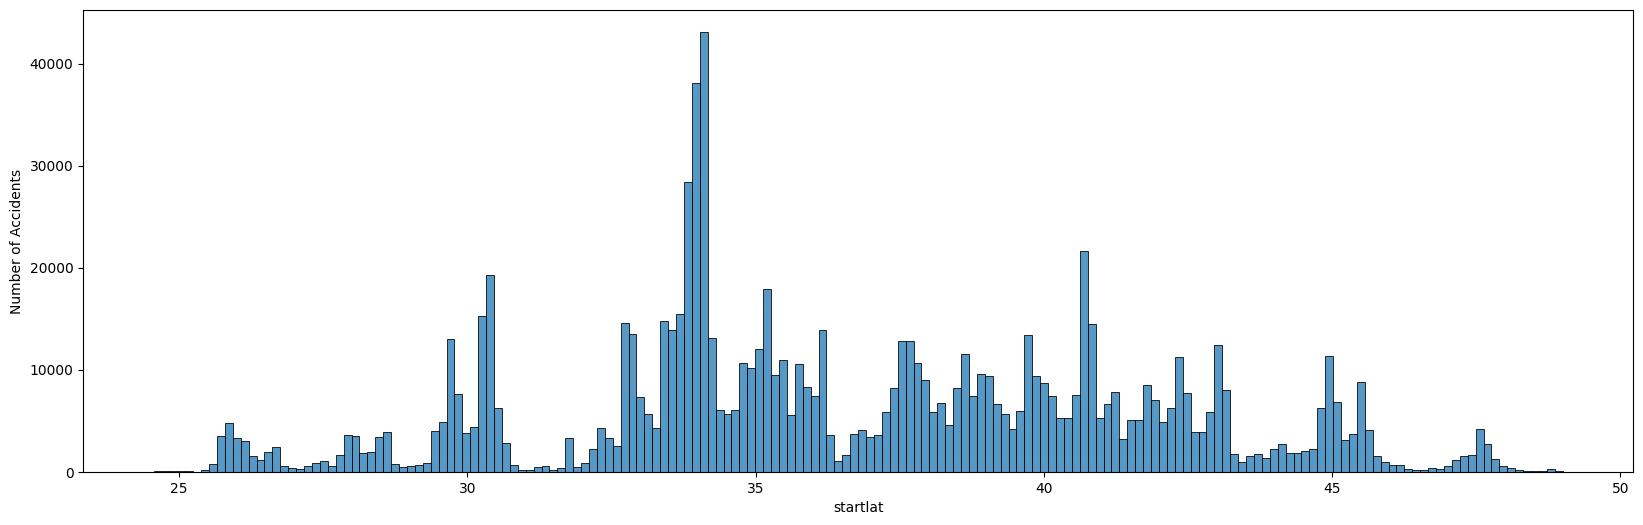

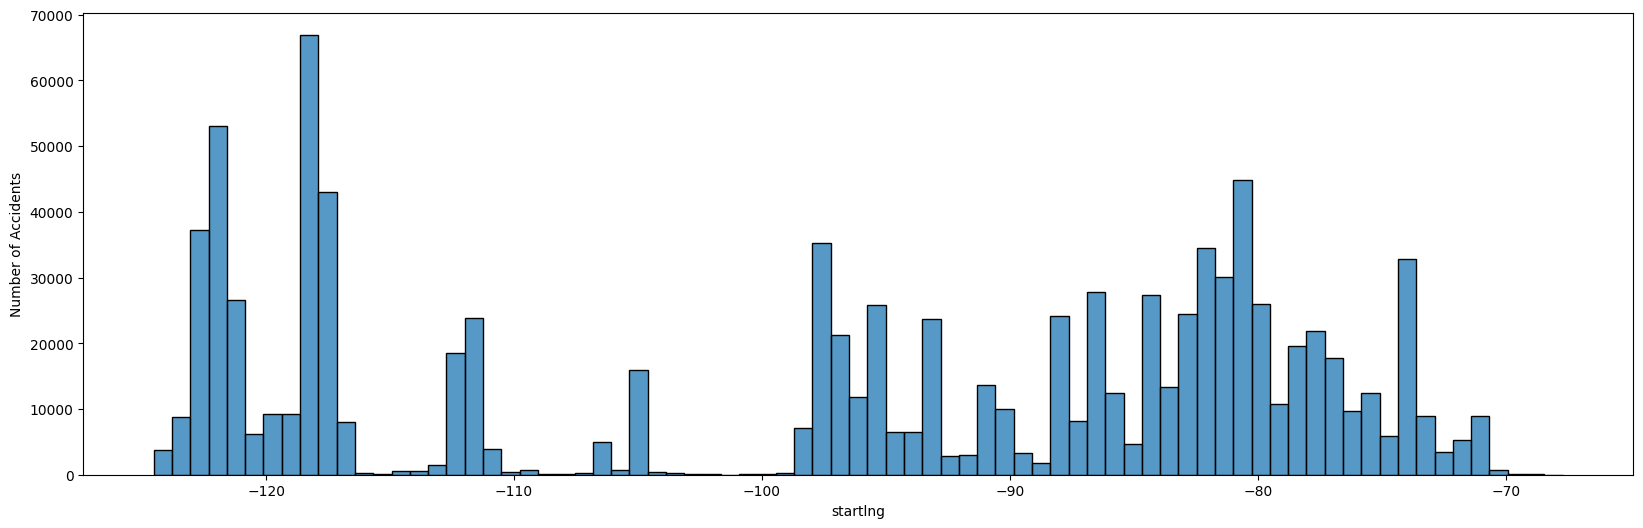

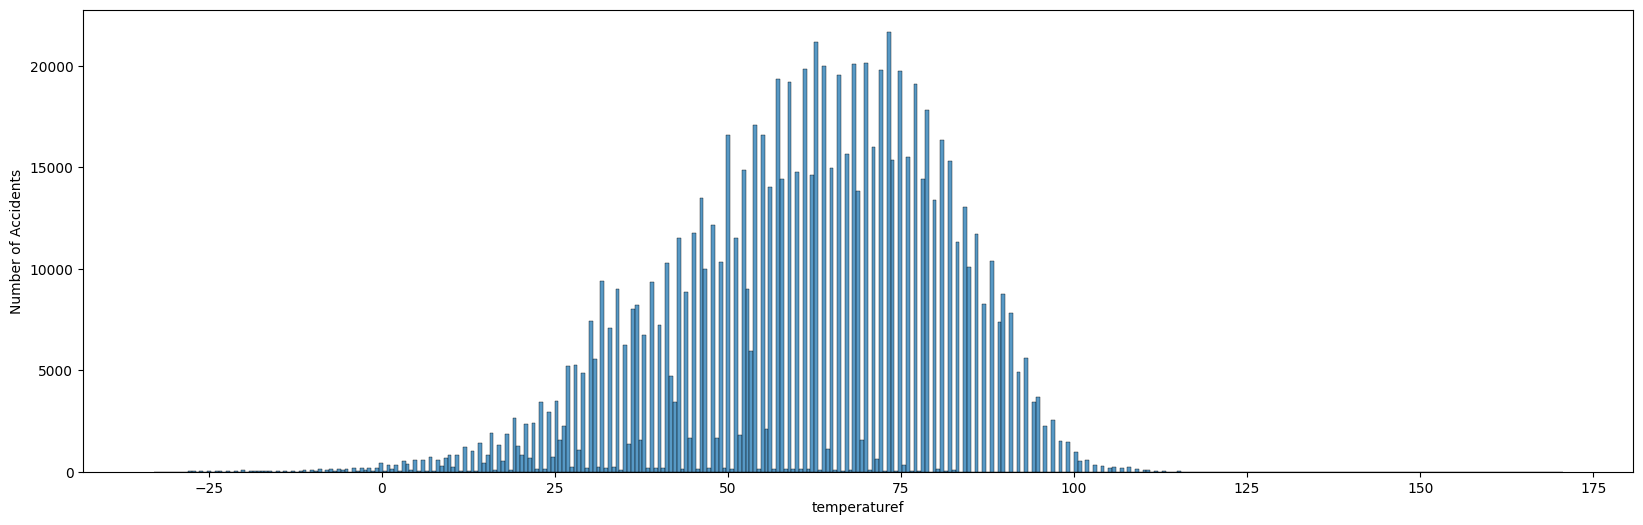

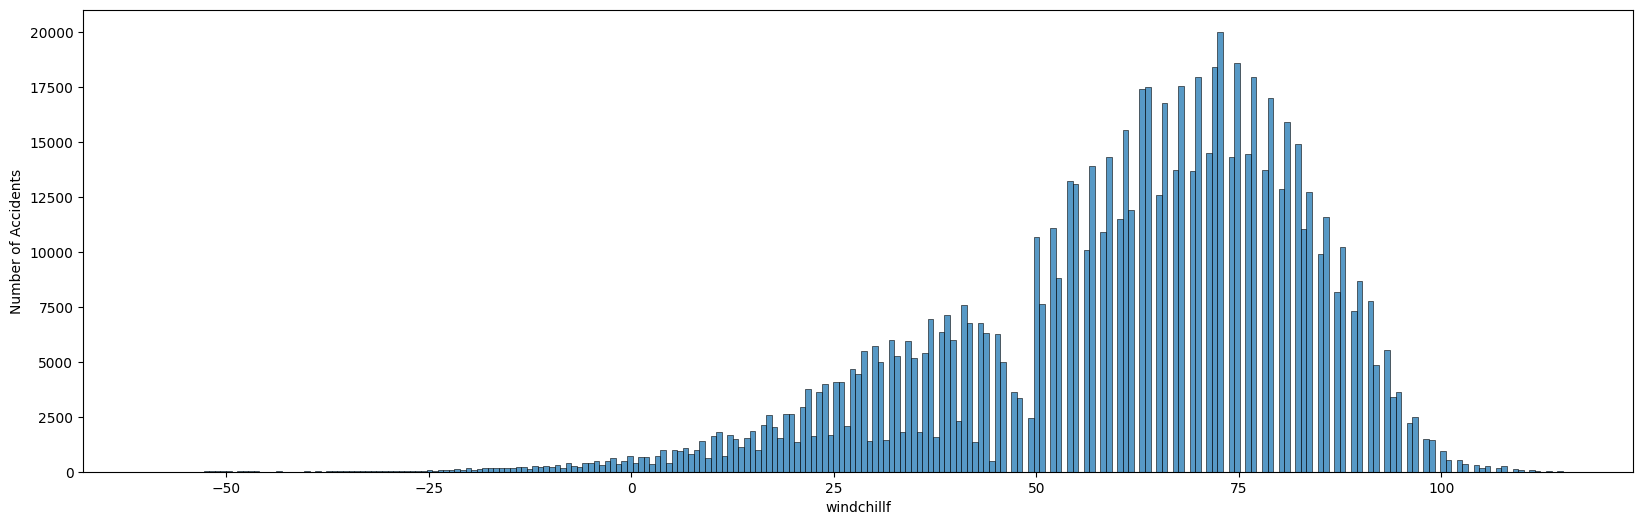

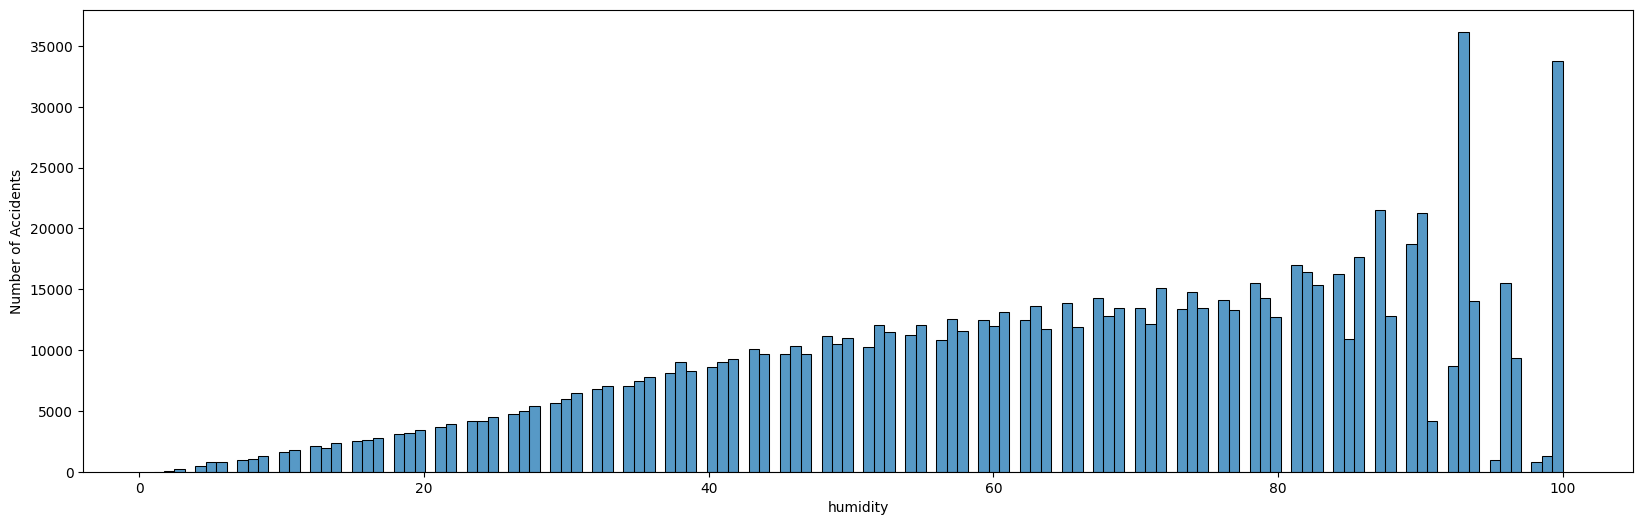

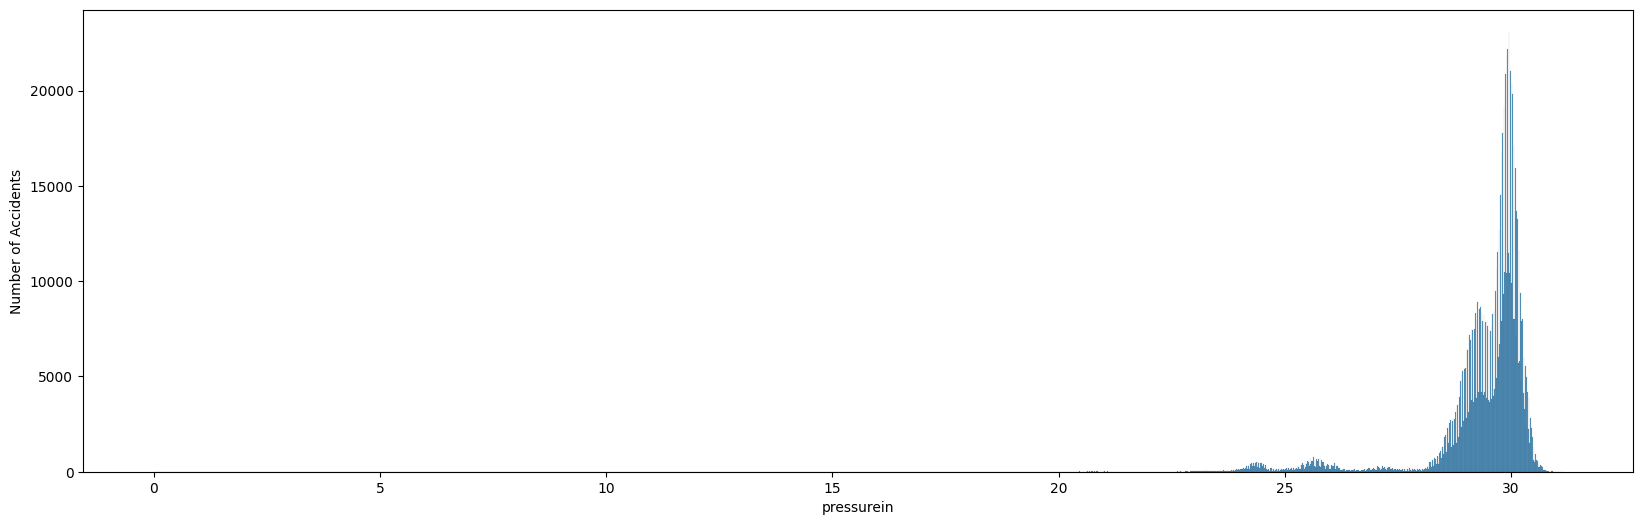

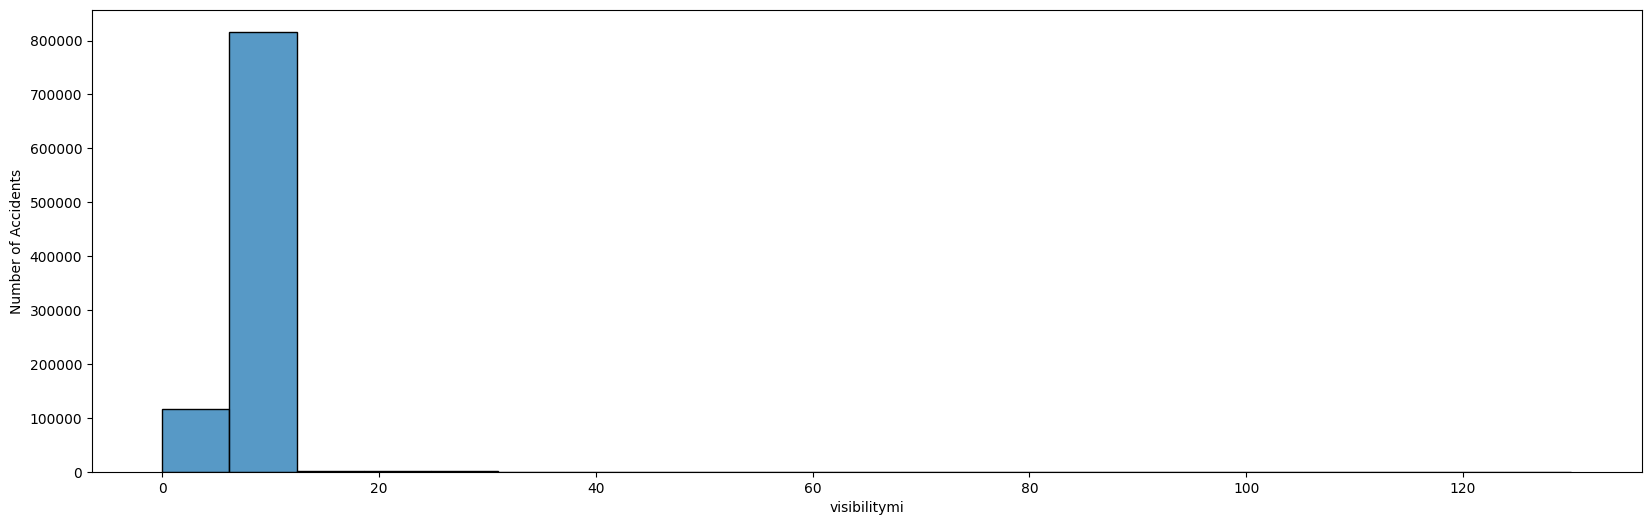

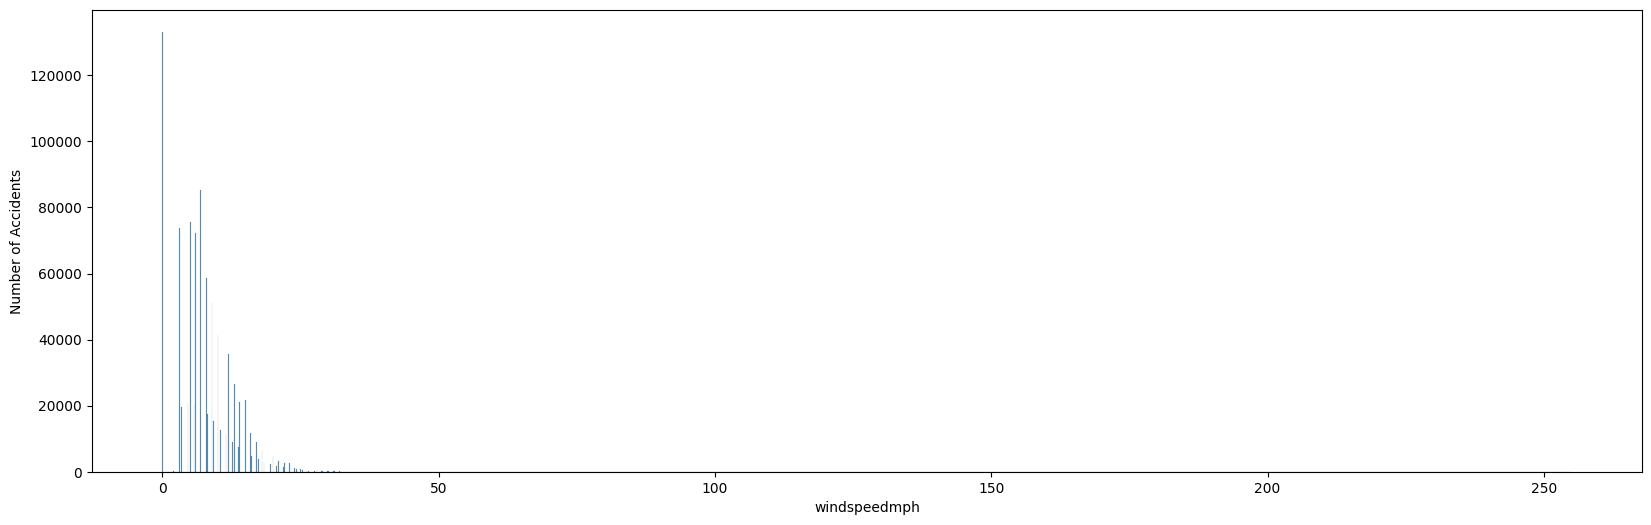

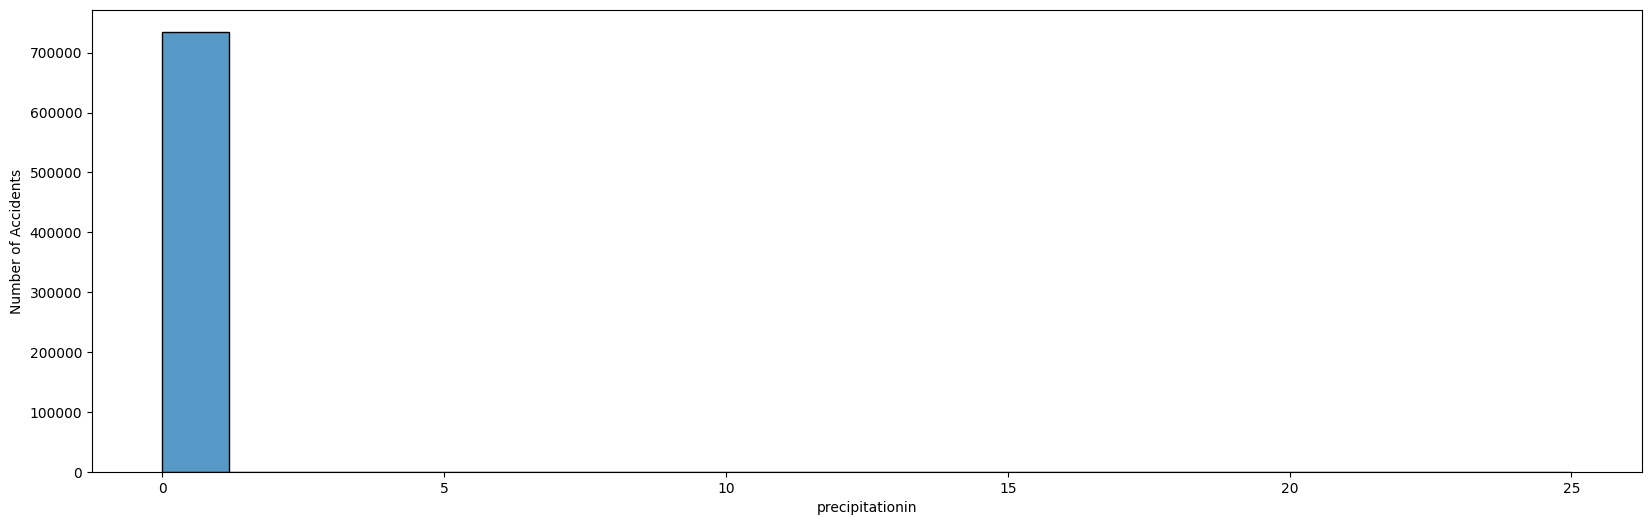

In [11]:
# Numerical Variables Histograms

for i in df[numerical].columns:
    plt.figure(figsize=(20, 6))
    sns.histplot(df[numerical][i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('Number of Accidents')
    plt.show

In [15]:
# Check the % of missing df per feature. 

missing = pd.DataFrame(df.isnull().sum()).reset_index()
missing.columns = ['Feature', 'Missing_Percent(%)']
missing['Missing_Percent(%)'] = missing['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
missing.loc[missing['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
6,city,0.001991
9,zipcode,0.032904
10,timezone,0.149114
11,airportcode,0.234203
12,weathertimestamp,1.218273
13,temperaturef,1.794505
14,windchillf,15.642113
15,humidity,1.907887
16,pressurein,1.439062
17,visibilitymi,1.930626


In [17]:
# Export the df 

df.to_parquet('../data/raw/US_Accidents_2019_for_EDA.parquet', engine='pyarrow')

#### Analysis Conclusion

Looking at the graphics, we can conclude that all the distributions are normal distributions, because they represent value measures like Farenheit, PSI, inches. Also since the df of the numerical categories has a lot of NaN we cannot due a succesful p-test without doing a proper EDA and clean up the df. 

So in conclusion, we will have to start the EDA to indentify the best possible predictor features to establish our model. But as far as we can see from the df, there's is possibly good information to create a Severity Prediction model. 